# **Flag Classification**

---

#### **Description**

TODO

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Visualization

---

Spend some time getting familiar with the datset. Make visualizations ...

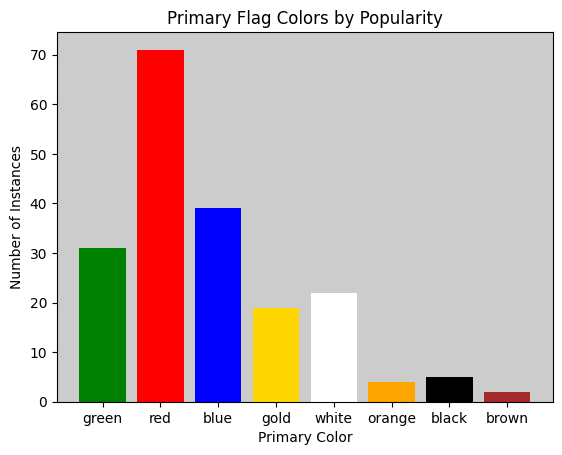

In [21]:
df = pd.read_csv('flag_data.csv')
hues = df['mainhue'].unique()
vals = [df['mainhue'].value_counts()[hue] for hue in hues]

plt.axes().set_facecolor('#ccc')
plt.bar(hues, vals, align='center', color=hues)
plt.title('Primary Flag Colors by Popularity')
plt.xlabel('Primary Color')
plt.ylabel('Number of Instances')
plt.show()

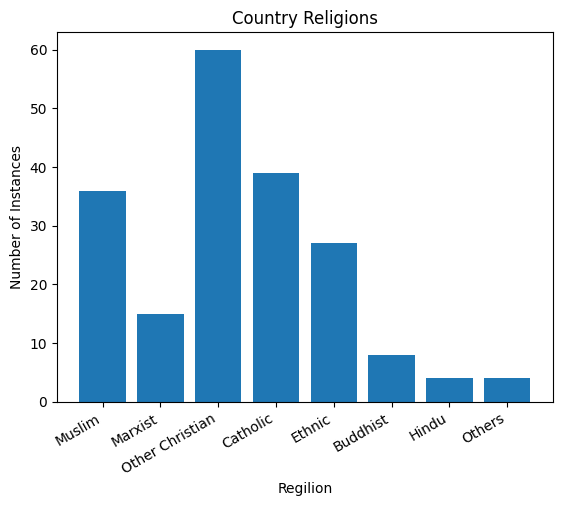

In [32]:
religions = df['religion'].unique()
vals = [df['religion'].value_counts()[religion] for religion in religions]

plt.bar(religions, vals, align='center')
plt.title('Country Religions')
plt.xlabel('Regilion')
plt.ylabel('Number of Instances')
plt.xticks(rotation=30, ha='right')
plt.show()

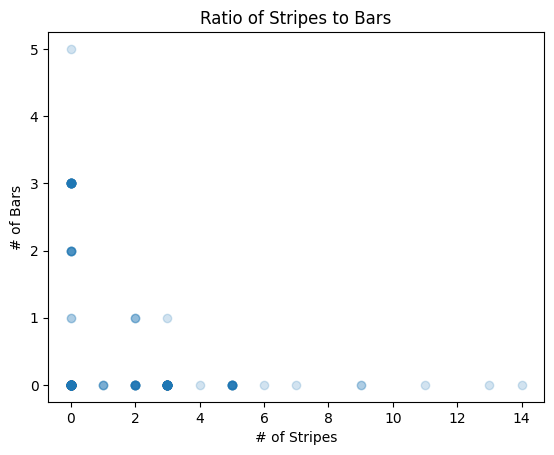

In [37]:
plt.scatter(df['stripes'],df['bars'], alpha=0.2)
plt.title('Ratio of Stripes to Bars')
plt.xlabel('# of Stripes')
plt.ylabel('# of Bars')
plt.show()

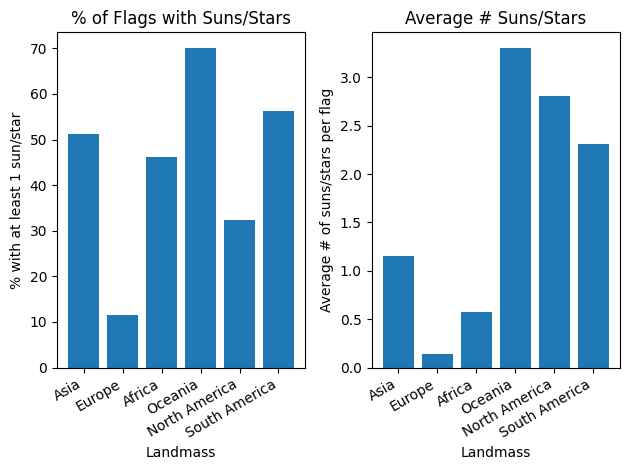

In [58]:
landmasses = df['landmass'].unique()
percents = []
averages = []
for lm in landmasses:
    group = df[df['landmass'] == lm]
    
    with_stars = group[group['sunstars'] > 0]
    percents.append(100 * len(with_stars) / len(group))

    star_sum = group['sunstars'].sum()
    averages.append(star_sum / len(group))

plt.subplot(1,2,1)
plt.bar(landmasses, percents)
plt.title('% of Flags with Suns/Stars')
plt.xlabel('Landmass')
plt.ylabel('% with at least 1 sun/star')
plt.xticks(rotation=30, ha='right')

plt.subplot(1,2,2)
plt.bar(landmasses, averages)
plt.title('Average # Suns/Stars')
plt.xlabel('Landmass')
plt.ylabel('Average # of suns/stars per flag')
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

## Classification

---



In [96]:
# Categorical Data Labels

landmasses = {1:'North America', 2:'South America', 3:'Europe', 4:'Africa', 5:'Asia', 6:'Oceania'}
zones = {1:'NE', 2:'SE', 3:'SW', 4:'NW'}
languages = {1:'English', 2:'Spanish', 3:'French', 4:'German', 5:'Slavic', 6:'Other Indo-European', 7:'Chinese', 8:'Arabic', 9:'Japanese/Turkish/Finnish/Magyar', 10:'Others'}
religions = {0:'Catholic', 1:'Other Christian', 2:'Muslim', 3:'Buddhist', 4:'Hindu', 5:'Ethnic', 6:'Marxist', 7:'Others'}
colors = {'red':1, 'green':2, 'blue':3, 'gold':4, 'white':5, 'black':6, 'orange':7, 'brown':8}

attr_names = {'landmass':landmasses, 'zone':zones, 'language':languages, 'religion':religions, 'mainhue':colors, 'topleft':colors, 'botright':colors}

In [260]:
df = pd.read_csv("flag_data_cleaned.csv")
df

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,...,saltires,quarters,sunstars,cresent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,6,2
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,1,1
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,2,5
3,American Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,3,1
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Western Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,3,1
189,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,3,1
190,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,2,2
191,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,2,8


In [250]:
target = 'landmass'
target_col = df[target]
target_names = attr_names[target]

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[target]), target_col, test_size=0.2, random_state=30)

train_names = X_train['name']
X_train = X_train.drop(columns=['name'])

test_names = X_test['name']
X_test = X_test.drop(columns=['name'])

In [257]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(metrics.accuracy_score(pred,y_test))
print(metrics.precision_score(pred,y_test, average='macro'))
print(metrics.recall_score(pred,y_test, average='macro'))

0.8461538461538461
0.7559523809523809
0.6972222222222223


In [258]:
"""
Get the flag images for the specified countries from img_links.csv
Return as a list of HTML formatted strings
"""
def flag_column(countries, image_size=150):
    data = pd.read_csv("img_links.csv")
    flag_data = []
    for country in countries:
        row = data.loc[data['name'] == country]
        html = html_img(row['image'][row.index[0]], row['year'][row.index[0]], image_size)
        flag_data.append(html)
    return flag_data


"""
Create an HTML image tag using the flag's image url, set the img width
Add the year/version of the flag as small font below the image
Return as one string
"""
def html_img(link, year, size):
    img = f'<img src="{link}" width={size} /><br>'
    font = f'<font size=1><i>({year})</i></font>'
    return img + font


"""
- Center year text under flag image
- Make country names bold
- Highlight incorrect predictions in red
"""
def output_styling(column, actual_col):
    if 'flag' in column.name.lower():
        return ['text-align: center' for val in column]
    elif 'name' in column.name.lower() or 'country' in column.name.lower():
        return ['font-weight: bold' for val in column]
    return ['color: red' if column[idx] != actual_col[idx] else 'color: default' for idx in column.index]

In [259]:
results_df = pd.DataFrame()
results_df.insert(0, 'Country', test_names, True)
results_df.insert(1, 'Actual', [target_names[x] for x in y_test], True)
results_df.insert(2, 'Predicted', [target_names[x] for x in pred], True)
results_df.insert(0, 'Flag', flag_column(test_names), True)

output = results_df.style.apply(output_styling, actual_col=results_df['Actual'])

# add a 'title' and display styled table
from IPython.display import display, HTML
display(HTML(f'<h2>{target.capitalize()}</h2>' + output.to_html()))

,Flag,Country,Actual,Predicted
67,(1822),Greece,Europe,Europe
54,(1919),Faroe Islands,Europe,North America
157,(1999),St Helena,Africa,Oceania
166,(1980),Syria,Asia,Asia
123,(1971),Nicaragua,North America,North America
96,(1943),Lebanon,Asia,Asia
72,(1958),Guinea,Africa,Africa
24,(1959),Brunei,Asia,Asia
192,(1980),Zimbabwe,Africa,Africa
90,(1939),Jordan,Asia,Asia


## Regression

---

In [87]:
df = pd.read_csv("flag_data_cleaned.csv")

target = 'colors'
target_col = df[target]

df = df.drop(columns=['red','green','blue','gold','white','black','orange'])

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[target]), target_col, test_size=0.2, random_state=30)

train_names = X_train['name']
X_train = X_train.drop(columns=['name'])

test_names = X_test['name']
X_test = X_test.drop(columns=['name'])

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("R2: " + str(metrics.r2_score(y_test, pred)))
print("MSE: " + str(metrics.mean_squared_error(y_test, pred)))
print("MAE: " + str(metrics.mean_absolute_error(y_test, pred)))

R2: 0.35342122020151057
MSE: 0.8910119148307916
MAE: 0.7086284136653848


In [89]:
results_df = pd.DataFrame()
results_df.insert(0, 'Name', test_names, True)
results_df.insert(1, 'Actual', y_test, True)
results_df.insert(2, 'Predicted', pred, True)
results_df.insert(0, 'Flag', flag_column(test_names), True)

output = results_df.style.apply(output_styling, actual_col=results_df['Actual'])

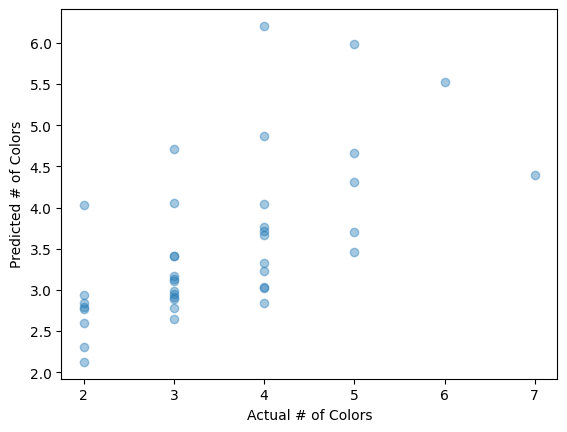

In [90]:
plt.scatter(y_test, pred, alpha=0.4)
plt.xlabel('Actual # of Colors')
plt.ylabel('Predicted # of Colors')
plt.show()

## Dataset

---

In [262]:
df = pd.read_csv("flag_data.csv")
df.insert(0, 'Flag', flag_column(df['name'], 100))

df.style

,Flag,name,landmass,zone,area,population,language,religion,bars,stripes,colors,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,cresent,triangle,icon,animate,text,topleft,botright
0,(1980),Afghanistan,Asia,NE,648,16,Others,Muslim,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,(1946),Albania,Europe,NE,29,3,Other Indo-European,Marxist,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,(1962),Algeria,Africa,NE,2388,20,Arabic,Muslim,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,(1960),American Samoa,Oceania,SW,0,0,English,Other Christian,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,(1971),Andorra,Europe,NE,0,0,Other Indo-European,Catholic,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
5,(1975),Angola,Africa,SE,1247,7,Others,Ethnic,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
6,(1967),Anguilla,North America,NW,0,0,English,Other Christian,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
7,(1967),Antigua-Barbuda,North America,NW,0,0,English,Other Christian,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
8,(1818),Argentina,South America,SW,2777,28,Spanish,Catholic,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
9,(1908),Australia,Oceania,SE,7690,15,English,Other Christian,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
